# Logistic regression

Logistic regression เป็น supervised machine learning algorithm ที่จำแนกกลุ่มข้อมูลในชุดข้อมูลที่ประกอบด้วยกลุ่มข้อมูลตั้งแต่สองกลุ่มขึ้นไป  โดยมีเป้าหมายในการทำนายความน่าจะเป็นของผลลัพธ์ที่จะอยู่ในกลุ่มที่ต้องการหรือไม่ ในเชิงคณิตศาสตร์ โมเดล Logistic Regression ใช้สมการสำหรับการคำนวณค่าความน่าจะเป็น (probability) ของผลลัพธ์ในกลุ่มที่ต้องการ โดยใช้ logistic function หรือ sigmoid function เพื่อแปลงผลรวมเชิงเส้นเป็นค่าความน่าจะเป็นระหว่าง 0 ถึง 1

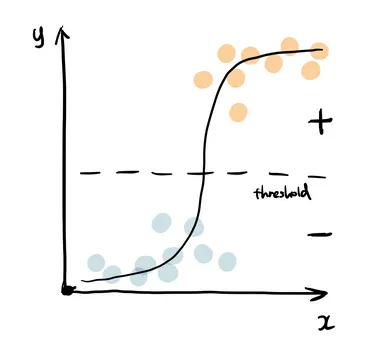
Logistic regression [ที่มา](https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501)

ก่อนหน้านี้ เราได้เรียนรู้ Simple Linear Model ทำให้เราสามารถพัฒนาโมเดล linear regression ที่เรียนรู้จากชุดข้อมูลโดย minimize ความคลาดเคลื่อนระหว่างค่าจริงและค่าที่ทำนายจากโมเดล  เพื่อทำนายค่า $y$ ที่เป็นค่าที่มีความต่อเนื่อง (continuous) ได้เป็นอย่างดี  หากเราได้รับโจทย์ใหม่ ซึ่งค่า $y$ มีลักษณะ discrete เช่น $y=0,1,2,...,k$ การใช้โมเดล linear regression เพื่อทำนาย dicrete output ในลักษณะนี้จะทำงานได้ไม่ดีและมีความคลาดเคลื่อนสูง
ทั้งนี้ โจทย์ที่มี discrete output จะจัดเป็น *classification problem* หรือ ปัญหาการแบ่งคลาส

กำหนดให้เรามีชุดข้อมูล จำนวน $n$ จุด $(x_1,y_1), (x_2,y_2), ..., (x_i,y_i),.., (x_n,y_n)$ โดย $y$ ที่มีค่าเป็น 0 หรือ 1 คือ ค่า $y$ มี 2 คลาส ซึ่งมีชื่อเรียกเฉพาะว่า *Binary Classification*

แทนที่จะพิจารณาความสัมพันธ์ระหว่างค่า $x$ และค่า $y$ โดยตรง เราสามารถพิจารณาความน่าจะเป็น (probability) ซึ่งมีค่าในช่วง 0 ถึง 1 ซึ่งเหมาะสมกับค่า $y$ ด้วย logistic function หรือ Sigmoid function

\begin{align}
g(z) = \frac{1}{1 + e^{-z}}
\end{align}
จะเห็นได้ว่า $g(z)→0$ เมื่อ $z→-∞ $ และ $g(z)→1$ เมื่อ $z→+∞ $

ค่าความน่าจะเป็นนี้จะถูกแปลงเป็นค่า $y$ ที่มีลักษณะ discrete สามารถเป็นได้เฉพาะ 0 หรือ 1  โดยเราจะเลือกใช้ decision boundary เป็นค่าเกณฑ์การตัดสินใจในการแบ่งค่าความน่าจะเป็น จะแนกเป็นคลาสต่างๆ เช่น
- $P ≥ 0.5 → y=1$
- $P < 0.5 → y=0$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ตั้งค่า random seed สำหรับการทำซ้ำ (reproducibility)
RANDOM_SEED = 2566

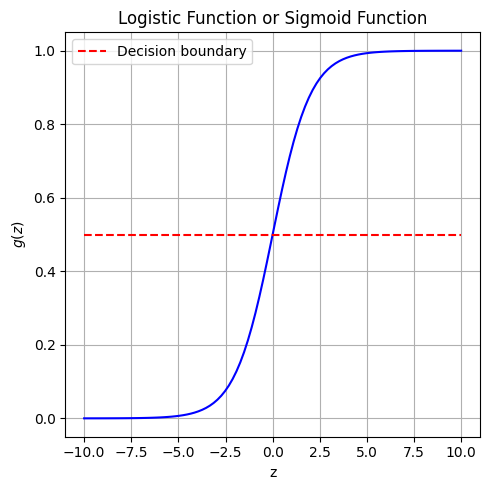

In [ ]:
def sigmoid_function(y):
    return 1 / (1 + np.exp(-y))

def decision_boundary(x, y_prob_threshold):
    return np.array([y_prob_threshold for val in x])

# คำนวณค่า sigmoid function ด้วยช่วงค่า x ที่กำหนด
z   = np.linspace(-10, 10, 100)
sig = sigmoid_function(z)

# plot sigmoid function
plt.figure(figsize = (5,5))
plt.plot(z, sig, 'b')

# ยกตัวอย่าง decision boundary ที่ y_prob = 0.5
# plot decision boundary
decision_threshold = 0.5
plt.plot(z, decision_boundary(z,decision_threshold), 'r--', label='Decision boundary')

plt.grid()
plt.xlabel('z')
plt.ylabel('$g(z)$')
plt.title('Logistic Function or Sigmoid Function')
plt.legend()
plt.tight_layout()
plt.show()


โดยเราสามารถนิยามความน่าจะเป็นที่ $y=1$ หรือ $P(y=1|x;w)$ ด้วย Logistic function
\begin{align}
p_w(x) = g(w^T x) = \frac{1}{1 + e^{-w^T x}}
\end{align}

โดย
\begin{align}
P(y=1|x;w)&=p_w(x) \\
P(y=0|x;w)&=1-p_w(x)
\end{align}

ซึ่งสามารถรวมความน่าจะเป็นทั้งสองในรูป
\begin{align}
P(y|x;w)= \big(p_w(x)\big)^y \big(1-p_w(x)\big)^{1-y}
\end{align}

เนื่องจาก เรามีข้อมูลจำนวน $n$ ชุด ความน่าจะเป็นรวม (likelihood) คือ ผลคูณของทุกๆ ความน่าจะเป็น
\begin{align}
\mathcal{L}(w) &=P((y_1,y_2,...,y_i...,y_n )|(x_1, x_2,...,x_i...,x_n);w)  \\
&=\prod_{i=1}^{n} \big(p_w(x_i)\big)^{y_i} \big(1-p_w(x_i)\big)^{1-y_i}
\end{align}

ทั้งนี้ $w$ คือ เวกเตอร์พารามิเตอร์ของโมเดล logistic regression ที่ต้องการปรับค่าด้วยการ fit กับชุดข้อมูล เพื่อให้โมเดลสามารถทำนายค่า $y$ ได้อย่างแม่นยำ

โดยเราสามารถเปลี่ยนสมการจากผลคูณรวม ไปเป็นผลบวกรวม ได้ด้วย logarithms ซึ่งจะง่ายต่อการ maximize หรือ minimize ต่อไป
\begin{align}
l(w) = \log \mathcal{L}(w)
= \sum_{n=1}^{n} y_i \log p_w(x_i) + (1-y_i) \log(1-p_w(x_i))
\end{align}

เนื่องจากเป็นผลรวมของ positive terms เราสามารถ maximize $\log$ likelihood หรือ $l(w)$ เพื่อหาค่า $w$ ที่ทำให้โมเดลสามารถทำนายค่า $y$ ได้อย่างแม่นยำ

อย่างไรก็ดี จะเห็นได้ว่า เราไม่สามารถเขียน $w$ ในรูป explicit function ได้เหมือนความคลาดเคลื่อนของ linear model ก่อนหน้านี้ ดังนั้น การหาค่า $w$ จะใช้ iterative solvers ที่จะยกตัวอย่างต่อไป

## Generate simulated dataset
เพื่อเปรียบเทียบ Linear regression และ Logistic regression เราจะลองสร้างชุดข้อมูลที่ประกอบไปด้วย จำนวน $n=100$ จุด $(x_1,y_1), (x_2,y_2), ..., (x_i,y_i),.., (x_n,y_n)$

โดย $y$ มีค่า 0 หรือ 1 (2-class dataset for binary classification)

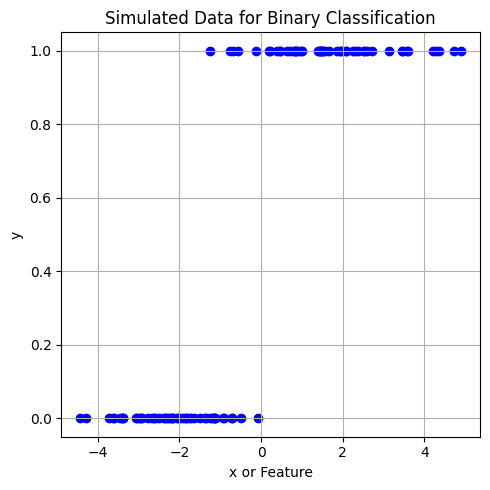

In [ ]:
def generate_multi_class_dataset(n_classes, n_features, mean_class, std_class,n_samples):
    # สร้างชุดข้อมูลแบบ multi-class
    # ตั้งค่า random seed สำหรับการทำซ้ำ (reproducibility)
    np.random.seed(RANDOM_SEED)

    #  สร้างข้อมูล x สำหรับแต่ละคลาส
    x_data = []
    for label in range(n_classes):
        _ = np.random.normal(mean_class[label], std_class[label], (n_samples, n_features))
        x_data.append(_)

    # สร้างข้อมูล y หรือ labels สำหรับแต่ละคลาส
    y_data = []
    y_data.append(np.zeros(n_samples))
    for label in range(1, n_classes):
        y_data.append(label*np.ones(n_samples))

    # รวมข้อมูล x และ y จากทุกคลาส
    x = np.vstack((x_data))
    y = np.hstack(y_data)

    return x, y

# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 2

# กำหนด จำนวน features
n_features = 1

# กำหนดค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [-2, 2]
std_class  = [1, 1.5]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส (รวม 100 จุด)
n_samples =  50

# ทำการสร้างชุดข้อมูล
x,y = generate_multi_class_dataset(n_classes, n_features, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่มีสร้างขึ้น
plt.figure(figsize = (5,5))
plt.scatter(x, y, c='b')
plt.grid()
plt.ylabel('y')
plt.xlabel('x or Feature')
plt.title('Simulated Data for Binary Classification')
plt.tight_layout()
plt.show()

เราจะลอง fit ข้อมูลชุดนี้ ด้วย [Linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) และ [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) จากไลบรารี่ `scikit-learn`

Linear model: R2 = 0.71
Logistic model: accuracy = 0.95
Logistic regression: probability function $p(x) = g(x*2.31 + 1.08)


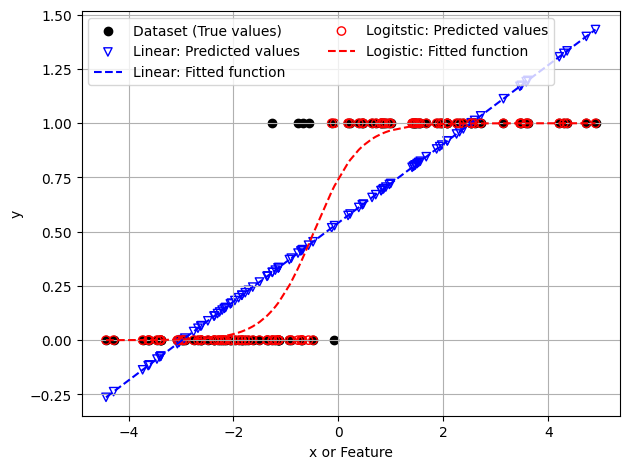

In [ ]:
# สร้าง Linear Model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
# สอนโมเดลจากข้อมูล x, y ที่มี แล้วทำนายค่า $y$
clf.fit(x, y)
y_linear = clf.predict(x)
print('Linear model: R2 = {:.2f}'.format(clf.score(x,y)))
sorted_x = np.sort(x.ravel())
y_linear_func = sorted_x*clf.coef_[0] + clf.intercept_

# สร้าง Logistic Model
clf = LogisticRegression()
# สอนโมเดลจากข้อมูล x, y ที่มี แล้วทำนายค่า $y$
clf.fit(x, y)
y_logit = clf.predict(x)
print('Logistic model: accuracy = {:.2f}'.format(clf.score(x,y)))
y_logit_func = sigmoid_function(sorted_x*clf.coef_[0] + clf.intercept_)
print('Logistic regression: probability function $p(x) = g(x*{:.2f} + {:.2f})'.format(clf.coef_[0][0], clf.intercept_[0]))

# Plot ข้อมูล x, y ที่มีอยู่
fig, ax = plt.subplots()
ax.scatter(x, y, c='k', marker='o', label='Dataset (True values)')
ax.scatter(x, y_linear, edgecolor='b', marker='v', facecolors='none', label='Linear: Predicted values')
ax.plot(np.sort(x.ravel()), y_linear_func, 'b--', label='Linear: Fitted function')
ax.scatter(x, y_logit, edgecolor='r', marker='o', facecolors='none', label='Logitstic: Predicted values')
ax.plot(np.sort(x.ravel()), y_logit_func, 'r--', label='Logistic: Fitted function')
ax.set(xlabel='x or Feature', ylabel='y')
ax.legend(ncols=2)
plt.grid()
plt.tight_layout()
plt.show()

จะเห็นได้ว่า ค่าที่ทำนายจากโมเดล linear regression มีความคลาดเคลื่อนสูงมาก ในขณะที่โมเดล logistic regression สามารถเรียนรู้และทำนายข้อมูลในลักษณะนี้ได้ดีกว่า โดยจะมีบางช่วงข้อมูลที่โมเดลทำนายคลาดเคลื่อน ซึ่งเป็นช่วงค่า $x$ ปรากฏข้อมูลทั้งสอง class และเนื่องจาก ชุดข้อมูลมีตัวแปร $x$ เพียงตัวเดียวจึงไม่เพียงพอในการจำแนกข้อมูลช่วงดังกล่าว

Quiz: Determine decision boundary, given $p(x) = g(x*2.13 + 1.08)$

จากตัวอย่างก่อนหน้านี้ ตัวแปร $x$ สามารถเรียกว่า Feature และ $y$ ในกรณีของ classification problem มักจะถูกเรียกว่า label หรือ class

ต่อไป เราจะลองสร้างชุดข้อมูลที่ประกอบด้วย 2 classes และ 2 features หรือ 2 ตัวแปร  เช่น ชุดข้อมูล จำนวน $n$ ข้อมูล $(x^0_1,x^1_1,y_1), (x^0_2, x^1_2,y_2), ..., (x^0_i,x^1_i,y_i),.., (x^0_n,x^1_n,y_n)$

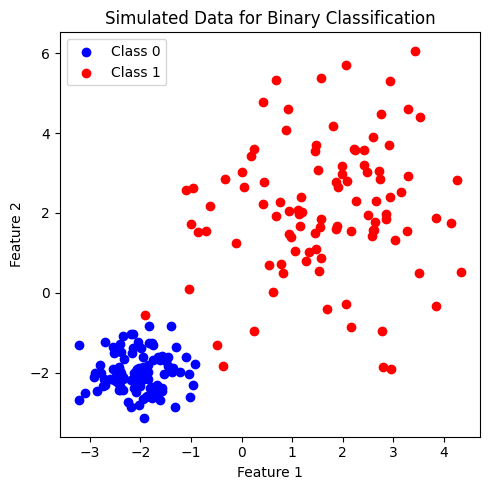

In [ ]:
# ทดลองสร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 2

# กำหนด จำนวน features
n_features = 2

# กำหนดช่วงค่า Mean และ standard deviation (SD) สำหรับแต่ละคลาส
# เนื่องจากเรากำหนดจำนวน features เป็น 2 จึงสามารถกำหนด Mean และ SD ด้วย array ของ 2 ค่า
mean_class = [[-2,-2], [2,2]]
std_class  = [[0.5,0.5], [1.5,1.5]]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 100

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, n_features, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่มีอยู่
plt.figure(figsize = (5,5))
plt.scatter(x[y==0, 0], x[y==0, 1], c='b', label='Class 0')
plt.scatter(x[y==1, 0], x[y==1, 1], c='r', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated Data for Binary Classification')
plt.legend()
plt.tight_layout()
plt.show()

## Decision Boundary

เราสามารถ visualize ลักษณะของ decision boundary โดยใช้ [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) จากไลบรารี่ `scikit-learn`

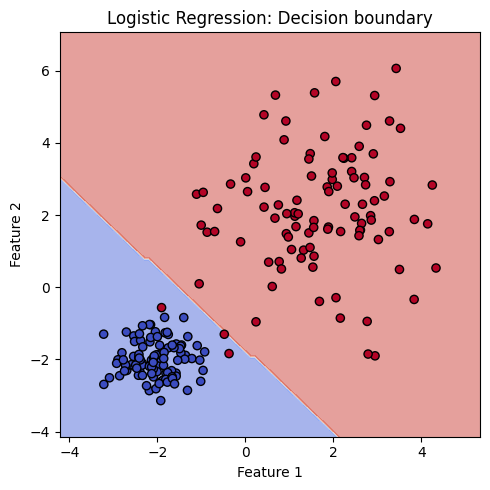

In [ ]:
# สร้างโมเดล
clf = LogisticRegression()

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
clf.fit(x, y)

# plot the decision boundary
plt.figure(figsize = (5,5))
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf,
                                       x,
                                       response_method="predict",
                                       cmap=plt.cm.coolwarm,
                                       alpha=0.5,
                                       ax=ax,
                                       xlabel='Feature 1',
                                       ylabel='Feature 2'
                                       )
ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
plt.title('Logistic Regression: Decision boundary')
plt.tight_layout()
plt.show()

แสดง decision boundary ของโมเดล logistic regression ที่มีลักษณะเป็นเส้นตรง จำแนกกลุ่มข้อมูลออกจากกัน

## Hyperparameters

### Generate 3-class dataset to challange the regression

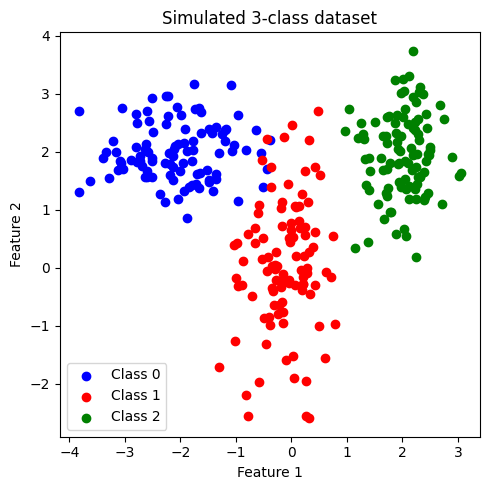

In [ ]:
# สร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 3

# กำหนด จำนวน features
n_features = 2

# กำหนดช่วงค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [[-2,2], [0,0], [2,2]]
std_class  = [[0.75,0.5], [0.5,1],[0.5,0.75]]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 100

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, n_features, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่สร้างขึ้น
plt.figure(figsize = (5,5))
color_list = ['b','r','g']
for label in range(n_classes):
    plt.scatter(x[y==label, 0], x[y==label, 1], c=color_list[label], label='Class '+str(label))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated 3-class dataset')
plt.legend()
plt.tight_layout()
plt.show()

### Logistic Regression เมื่อใช้ solvers ชนิดต่างๆ

เนื่องจาก เราต้องการ maximize $\log$ likelihood $l(w)$ เพื่อหาค่าพารามิเตอร์ $w$ ของโมเดล แต่เราไม่สามารถเขียน w ในรูป explicit function ดังนั้น การหาค่า $w$ จะใช้ iterative solvers อาทิเช่น

**Newton-CG Solver**:
- ใช้วิธี Newton-Conjugate Gradient
- เหมาะสำหรับข้อมูลขนาดใหญ่ แต่จะใช้ computer time มากตามจำนวน features
- สามารถใช้ร่วมกับ L2 regularization

**lbfgs Solver (Limited-memory Broyden-Fletcher-Goldfarb-Shanno)**:
- ใช้ L-BFGS algorithm ในการค้นหาค่าพารามิเตอร์ที่เหมาะสม
- เหมาะสำหรับข้อมูลขนาดเล็กถึงกลาง
- เป็น default solver ของ `scikit-learn` ในการทำ Logistic Regression
- สามารถใช้ร่วมกับ L2 regularization

**liblinear Solver**:
- วิธีการนี้ใช้เทคนิคจากไลบรารี LIBLINEAR
- เหมาะสำหรับข้อมูลขนาดเล็ก
- สามารถใช้ร่วมกับ L1 และ L2 regularization

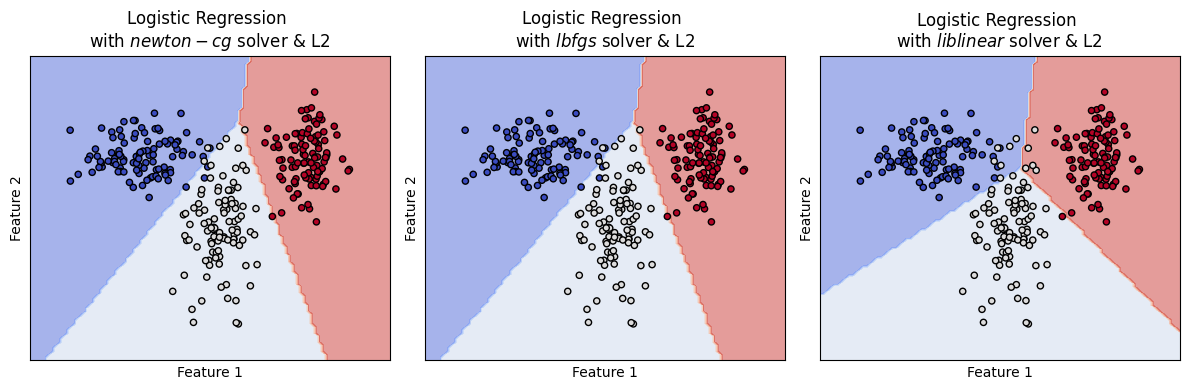

In [ ]:
# สร้างชุดโมเดล
models = (LogisticRegression(solver='newton-cg', C=1),
          LogisticRegression(solver='lbfgs', C=1),
          LogisticRegression(solver='liblinear', C=1),
          )

# สอนโมเดลจากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้
models = (clf.fit(x, y) for clf in models)

# ตั้งชื่อ plot ที่สอดคล้องกับชุดข้อมูล
titles = ['Logistic Regression \nwith $newton-cg$ solver & L2',
          'Logistic Regression \nwith $lbfgs$ solver & L2',
          'Logistic Regression \nwith $liblinear$ solver & L2',
          ]

# plot the decision boundaries
fig, axes = plt.subplots(1,3, figsize=(12, 4))
for clf, title, ax in zip(models, titles, axes.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf,
                                                  x,
                                                  response_method="predict",
                                                  cmap=plt.cm.coolwarm,
                                                  alpha=0.5,
                                                  ax=ax,
                                                  xlabel='Feature 1',
                                                  ylabel='Feature 2',
                                                  )
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.tight_layout()
plt.show()

จะเห็นได้ว่า solvers ต่างๆ สามารถค้นหาค่าพารามิเตอร์ $w$ ที่เหมาะสม โดยมี Decision Boundary ที่ใกล้เคียงกัน ทั้งนี้ decision boundary ของโมเดล logistic regression จะประกอบขึ้นจากเส้นตรง แต่ยังคงสามารถนำไปใช้กับข้อมูลมีมีความสัมพันธ์แบบ non-linear ได้  โดยต่อไปเราจะได้เรียนรู้ Machine Learning ชนิดอื่นๆ ที่สร้าง decision boundary ได้หลากหลายมากขึ้น

### Logistic Regression เมื่อใช้ร่วมกับ Regularization

**Regularization** เป็นเทคนิคที่ใช้ในการควบคุมโมเดลเพื่อลดปัญหาการเกิด Overfitting หรือการเรียนรู้ข้อมูลสัญญาณที่เกินมากเกินไปจากข้อมูลฝึกสอน โดยใช้การเพิ่มค่าผลรวมของโมเดลพารามิเตอร์เข้าไปในฟังก์ชัน - log likelihood (หรือ loss function ในกรณีของ linear regression ที่ได้เรียนรู้ก่อนหน้านี้)

สมการสำหรับ L2 Regularization (Ridge regularization หรือ L2 penalty):

\begin{align}
- \log \mathcal{L}'(w)  = - \log \mathcal{L}(w) + \lambda\sum_{j=1}^m w_j^2,
\end{align}

สมการสำหรับ L1 Regularization (LASSO regularization หรือ L1 penalty):
\begin{align}
- \log \mathcal{L}'(w)  = - \log \mathcal{L}(w) + \lambda\sum_{j=1}^m |w_j|,
\end{align}

โดย $m$ คือ จำนวน features และ  $\lambda$ คือ Regularization Strength เมื่อทำให้ regularization สูงขึ้น โดยเพิ่มค่า $\lambda$ ที่สูงขึ้นจะทำให้โมเดลมีน้ำหนักของพารามิเตอร์ $w$ ที่ต่ำลง โดยเฉพาะในกรณี L1 regularization เมื่อ λ เพิ่มขึ้น จะทำให้บางพารามิเตอร์ที่ไม่สำคัญถูกปรับน้ำหนักเป็นศูนย์ ซึ่งช่วยในการเลือก feature ที่สำคัญในชุดข้อมูล ในทางกลับกันหากต้องการเก็บ features ไว้ การใช้ L2 regularization จะคงน้ำหนักของโมเดลพารามิเตอร์ได้ดีกว่า

ในไลบรารี่ `scikit-learn` เราสามารถปรับค่า $\lambda$ ได้โดยผ่านทางพารามิเตอร์ $C$ โดย ค่า $C$ มีค่าเท่ากับ $1/\lambda$ (Inverse of Regularization Strength)

newton-cg: max accuracy=0.9867 at C=10
lbfgs: max accuracy=0.9867 at C=10
liblinear: max accuracy=0.9767 at C=100


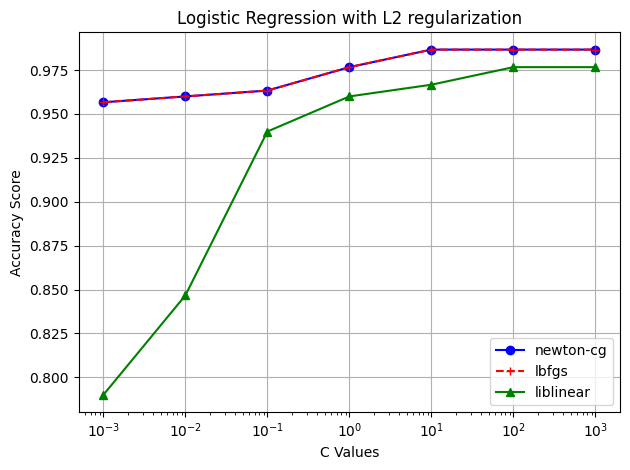

In [ ]:
# กำหนดช่วงค่า C
C_values = [0.001,0.01,0.1,1,10,100,1000]

# กำหนด solver
solvers = ['newton-cg', 'lbfgs', 'liblinear']
plotstlyes = {'newton-cg':'bo-', 'lbfgs':'r+--', 'liblinear':'g^-'}

# สร้างโมเดลด้วค่า C ต่างๆ ให้โมเดลเรียนรู้จากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้ แล้วทดสอบโมเดลด้วย accuracy score
for solver in solvers:
    accuracy = []
    for C_val in C_values:
        clf = LogisticRegression(solver=solver, C=C_val, penalty='l2')
        clf.fit(x, y)

        # ทำนายค่า y โดยใช้โมเดล
        prediction = clf.predict(x)

        # คำนวณ accuracy score
        accuracy.append(accuracy_score(y, prediction))

    # แสดงผล
    print('{}: max accuracy={:.4f} at C={}'.format(solver, np.max(accuracy), C_values[np.argmax(accuracy)]))
    plt.plot(C_values, accuracy, plotstlyes[solver], label=solver)
    plt.xscale('log')
    plt.xlabel('C Values')

plt.ylabel('Accuracy Score')
plt.title('Logistic Regression with L2 regularization')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

จะเห็นได้ว่า คะแนนความแม่นยำ ขึ้นอยู่กับค่า $C$ และ solver ที่เลือกใช้

liblinear & l2: max accuracy=0.9767 at C=100
liblinear & l1: max accuracy=0.9800 at C=1000


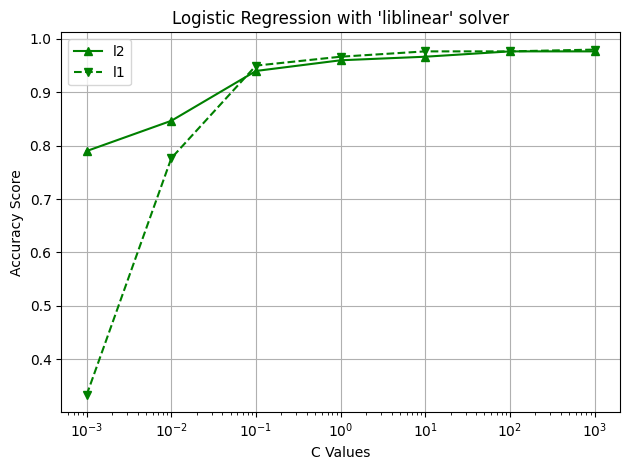

In [ ]:
# กำหนดช่วงค่า C
C_values = [0.001,0.01,0.1,1,10,100,1000]

# กำหนด regularization
penaltys = ['l2','l1']
solver = 'liblinear'
plotstlyes = {'l2':'g^-', 'l1':'gv--'}

# สร้างโมเดลด้วค่า C ต่างๆ ให้โมเดลเรียนรู้จากข้อมูล x, y ที่สร้างขึ้นก่อนหน้านี้ แล้วทดสอบโมเดลด้วย accuracy score
for penalty in penaltys:
    accuracy = []
    for C_val in C_values:
        clf = LogisticRegression(solver=solver, C=C_val, penalty=penalty)
        clf.fit(x, y)

        # ทำนายค่า y โดยใช้โมเดล
        prediction = clf.predict(x)

        # คำนวณ accuracy score
        accuracy.append(accuracy_score(y, prediction))

    # แสดงผล
    print('{} & {}: max accuracy={:.4f} at C={}'.format(solver, penalty, np.max(accuracy), C_values[np.argmax(accuracy)]))
    plt.plot(C_values, accuracy, plotstlyes[penalty], label=penalty)
    plt.xscale('log')
    plt.xlabel('C Values')

plt.ylabel('Accuracy Score')
plt.title('Logistic Regression with \'liblinear\' solver')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

เมื่อใช้ 'liblinear' solver กับข้อมูลชุดนี้ พบว่า ทั้ง L1 และ L2 regulariztion ให้ค่า accuracy ค่อนข้างคงที่เมื่อ $C>10^{-1}$ โดยมีค่า accuracy สูงสุดที่ $C=100$ สำหรับ L2 regularization และ $C=1000$ สำหรับ L1 regularization

## Logistic regression pipeline

### Generate 3-class dataset

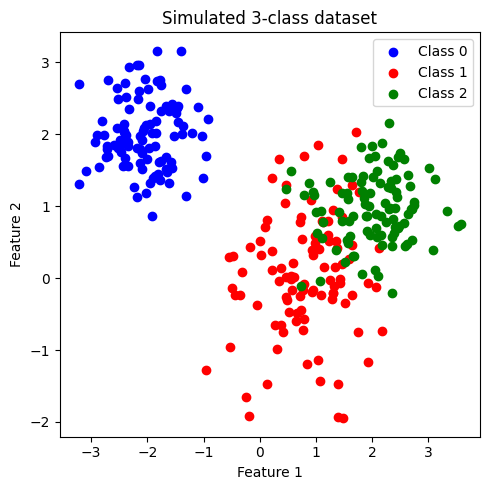

In [ ]:
# สร้างข้อมูลโดยการเรียกใช้ generate_multi_class_dataset
# กำหนด จำนวนคลาส
n_classes = 3

# กำหนด จำนวน features
n_features = 2

# กำหนดช่วงค่า Mean และ standard deviation สำหรับแต่ละคลาส
mean_class = [[-2,2], [1,0], [2,1]]
std_class  = [[0.5,0.5], [0.75,0.75],[0.75,0.5]]

# กำหนดจำนวนข้อมูล สำหรับแต่ละคลาส
n_samples = 100

# ทำการสร้างชุดข้อมูล
x, y = generate_multi_class_dataset(n_classes, n_features, mean_class, std_class,n_samples)

# Plot ข้อมูล x, y ที่สร้างขึ้น
plt.figure(figsize = (5,5))
color_list = ['b','r','g']
for label in range(n_classes):
    plt.scatter(x[y==label, 0], x[y==label, 1], c=color_list[label], label='Class '+str(label))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simulated 3-class dataset')
plt.legend()
plt.tight_layout()
plt.show()

ข้อมูลที่สร้างขึ้นมีประกอบด้วย 2 features และ label แบ่งเป็น 3 กลุ่ม (class: 0, 1, 2) เราจะพัฒนาโมเดล logistic regression เพื่อจำแนกข้อมูลในแต่ละกลุ่ม

เมื่อสังเกตการกระจายตัวของข้อมูล พบว่า class 0 มีการกระจายข้อมูลแบ่งแยกออกมาอย่างเห็นได้ชัด ในขณะที่ class 1 และ class 2 จะกระจายตัวอยู่ร่วมกัน

### แบ่งข้อมูลเป็น train-test และ cross-validation
โดยไม่กำกับการแบ่งตามสัดส่วนคลาสของคำตอบ (stratification)

In [ ]:
# สร้าง training data และ test data โดยแบ่งจากชุดข้อมูล x,y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=None, random_state=RANDOM_SEED)

print('Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print('Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label')
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

Train set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[ 0. 82.]
 [ 1. 79.]
 [ 2. 79.]]
Test set: จำนวนข้อมูล แบ่งกลุ่มตาม class label
[[ 0. 18.]
 [ 1. 21.]
 [ 2. 21.]]


### ทำการ standardize ข้อมูลทั้งหมด
ใช้ mean และ SD จาก training set ในการ standardize test set เพื่อป้องกัน information leak

In [ ]:
x_scaler = StandardScaler().fit(x_train)

x_train = x_scaler.transform(x_train)
x_test  = x_scaler.transform(x_test)

### เทรนโมเดล ด้วย base model (default hyperparameter)

Training Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       0.91      0.89      0.90        79
         2.0       0.89      0.91      0.90        79

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240


Test Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.93      0.67      0.78        21
         2.0       0.74      0.95      0.83        21

    accuracy                           0.87        60
   macro avg       0.89      0.87      0.87        60
weighted avg       0.89      0.87      0.86        60



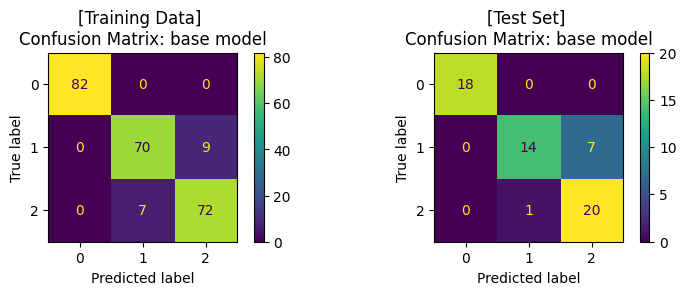

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# สร้างโมเดล
base_clf = LogisticRegression()

# สอนโมเดลด้วย training data
base_clf.fit(x_train,y_train)

# ให้โมเดลทำนาย training data
y_pred = base_clf.predict(x_train)

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของ training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: base model')

# ให้โมเดลทำนาย test data
y_pred = base_clf.predict(x_test)

# แสดงผล classification ของโมเดล
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))

# คำนวนและแสดงผล confusion matrix ของ test set
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Set] \nConfusion Matrix: base model')

plt.tight_layout()
plt.show()

### ปรับแต่งโมเดล (Hyperparameter Tuning) ด้วย [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) และ train โมเดล

โดยเราจะปรับแต่งโมเดล โดย tune 2 hyperparameters ที่สำคัญของ logistic regression ได้แก่
1. 'solver'
2. 'C'

ในไลบรารี่ `scikit-learn` ยังมีวิธีการอื่นๆ ในการปรับแต่งโมเดล เช่น
- [CrossValScore](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)
- [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation score: 0.92
Training Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        82
         1.0       0.88      0.90      0.89        79
         2.0       0.90      0.87      0.88        79

    accuracy                           0.93       240
   macro avg       0.92      0.92      0.92       240
weighted avg       0.93      0.93      0.92       240


Test Set: Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       0.94      0.71      0.81        21
         2.0       0.77      0.95      0.85        21

    accuracy                           0.88        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.90      0.88      0.88        60



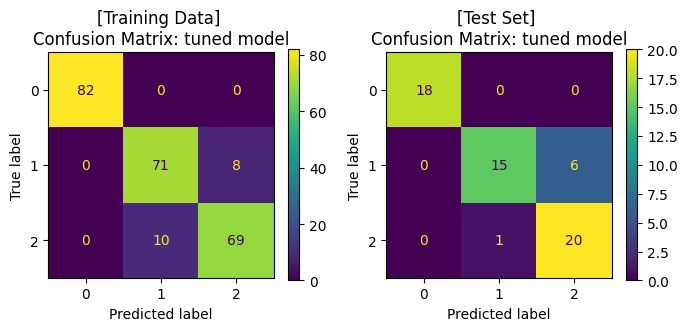

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# กำหนดช่วงค่า hyperparameters ในรูปแบบ dictionary
clf_params = {'solver': ['newton-cg','lbfgs','liblinear'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l2']
              }

# แบ่งข้อมูล training data ด้วย 5-fold cross-validation เพื่อ tune hyperparameter
cv_splitter = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# ใช้ GridSearchCV เพื่อสอนโมเดลจากชุดค่า hyperparameters จาก clf_params
# และคำนวณค่า accuracy ของแต่ละโมเดล เพื่อเลือกชุด hyperparameters ที่ดีที่สุด
# โดยใช้เทคนิค cross-validation ในการแบ่งกลุ่ม validation data จาก training data
tuned_clf = GridSearchCV(estimator=base_clf, param_grid=clf_params,
                             scoring=['accuracy'], refit='accuracy', cv=cv_splitter)

# fit โมเดลด้วย training data และ ให้โมเดลทำนายค่า y จาก training data
tuned_clf.fit(x_train, y_train)
y_pred = tuned_clf.predict(x_train)

# แสดงผล hyperparameters ที่ดีที่สุด และ cross-validation score
print('Best hyperparameters: {}'.format(tuned_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(tuned_clf.best_score_))

# แสดงผล classification ของโมเดลจาก training data
print('Training Set: Classification report')
print(classification_report(y_train, y_pred))

# คำนวนและแสดงผล confusion matrix ของโมเดลจาก training data
cm = confusion_matrix(y_train, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax1)
ax1.set_title('[Training Data] \nConfusion Matrix: tuned model')

# ให้โมเดลทำนายค่า y จาก test data
y_pred = tuned_clf.predict(x_test)

# แสดงผล classification ของโมเดล จาก test data
print('\nTest Set: Classification report')
print(classification_report(y_test, y_pred))
# คำนวนและแสดงผล confusion matrix จาก test data
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(ax=ax2)
ax2.set_title('[Test Set] \nConfusion Matrix: tuned model')

plt.show()

จะสังเกตได้ว่า เมื่อมีการปรับจูน hyperparameters ของโมเดลให้มีความเหมาะสมแล้ว เราได้โมเดลที่เรียนรู้จากข้อมูลชุดเดิม แล้วสามารถทำนายได้ค่า accuracy ที่สูงขึ้น โดยเมื่อพิจารณา Confusion Matrix จะพบว่า โมเดลสามารถจำแนกข้อมูล class 1 และ class 2 ได้ดีขึ้น